In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import json
import zipfile
from collections import Counter


# 공감형 대화 데이터셋 전체 데이터

In [2]:
training_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터"  #train set 
validation_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Validation/02.라벨링데이터" #validation set

In [3]:
def unzip_files_in_directory(directory, output_directory):
    # Check if output directory exists, if not, create it
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # List all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".zip"):
            zip_path = os.path.join(directory, filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(output_directory)
            print(f"Unzipped: {filename}")


train_input_directory = training_path  
train_output_directory = os.path.join(training_path, 'real_data')
validation_input_directory = validation_path  
validation_output_directory = os.path.join(validation_path, 'real_data')

unzip_files_in_directory(train_input_directory, train_output_directory)
unzip_files_in_directory(validation_input_directory, validation_output_directory)

Unzipped: TL_기쁨_부모자녀,조손.zip
Unzipped: TL_기쁨_부부.zip
Unzipped: TL_기쁨_연인.zip
Unzipped: TL_기쁨_지인.zip
Unzipped: TL_기쁨_직장 동료.zip
Unzipped: TL_기쁨_친구.zip
Unzipped: TL_기쁨_형제,자매.zip
Unzipped: TL_당황_부모자녀,조손.zip
Unzipped: TL_당황_부부.zip
Unzipped: TL_당황_연인.zip
Unzipped: TL_당황_지인.zip
Unzipped: TL_당황_직장 동료.zip
Unzipped: TL_당황_친구.zip
Unzipped: TL_당황_형제,자매.zip
Unzipped: TL_분노_부모자녀,조손.zip
Unzipped: TL_분노_부부.zip
Unzipped: TL_분노_연인.zip
Unzipped: TL_분노_지인.zip
Unzipped: TL_분노_직장 동료.zip
Unzipped: TL_분노_친구.zip
Unzipped: TL_분노_형제,자매.zip
Unzipped: TL_불안_부모자녀,조손.zip
Unzipped: TL_불안_부부.zip
Unzipped: TL_불안_연인.zip
Unzipped: TL_불안_지인.zip
Unzipped: TL_불안_직장 동료.zip
Unzipped: TL_불안_친구.zip
Unzipped: TL_불안_형제,자매.zip
Unzipped: TL_상처_부모자녀,조손.zip
Unzipped: TL_상처_부부.zip
Unzipped: TL_상처_연인.zip
Unzipped: TL_상처_지인.zip
Unzipped: TL_상처_직장 동료.zip
Unzipped: TL_상처_친구.zip
Unzipped: TL_상처_형제,자매.zip
Unzipped: TL_슬픔_부모자녀,조손.zip
Unzipped: TL_슬픔_부부.zip
Unzipped: TL_슬픔_연인.zip
Unzipped: TL_슬픔_지인.zip
Unzipped: TL_슬픔_직장 동료.zip
Unzipped: TL_슬픔_친

In [4]:
# 파일 개수 각각 확인
def count_files_in_directory(directory):
    files = os.listdir(directory)
    n_files = len(files)
    return print(f'{directory}: {n_files}')

count_files_in_directory(train_output_directory) #25456개 대화
count_files_in_directory(validation_output_directory) #3182개 대화

C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터\real_data: 25456
C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Validation/02.라벨링데이터\real_data: 3182


In [5]:
# 각 파일의 큰 대화 테마 개수
from collections import Counter

emotions = ["기쁨", "당황", "분노", "불안", "상처", "슬픔"]

def count_emotion_files(directory, emotions):
    emotion_counter = Counter()
    
    for filename in os.listdir(directory):
        for emotion in emotions:
            if emotion in filename:
                emotion_counter[emotion] +=1
    return emotion_counter

train_emotion_count = count_emotion_files(train_output_directory, emotions)
validation_emotion_count = count_emotion_files(validation_output_directory, emotions)

print("Training set emotion counts:", train_emotion_count)
print("Validation set emotion counts:", validation_emotion_count)


Training set emotion counts: Counter({'분노': 5133, '기쁨': 5005, '불안': 3849, '슬픔': 3848, '당황': 3828, '상처': 3793})
Validation set emotion counts: Counter({'분노': 639, '기쁨': 624, '불안': 493, '슬픔': 479, '당황': 476, '상처': 471})


Training set emotion counts: Counter({'분노': 5133, '기쁨': 5005, '불안': 3849, '슬픔': 3848, '당황': 3828, '상처': 3793})
Validation set emotion counts: Counter({'분노': 639, '기쁨': 624, '불안': 493, '슬픔': 479, '당황': 476, '상처': 471})


C:\Users\seowoo kim\AppData\Local\Temp\ipykernel_31652\1688967331.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(train_emotion_count.keys(), rotation=45, fontproperties=font_prop)
C:\Users\seowoo kim\AppData\Local\Temp\ipykernel_31652\1688967331.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(validation_emotion_count.keys(), rotation=45, fontproperties=font_prop)


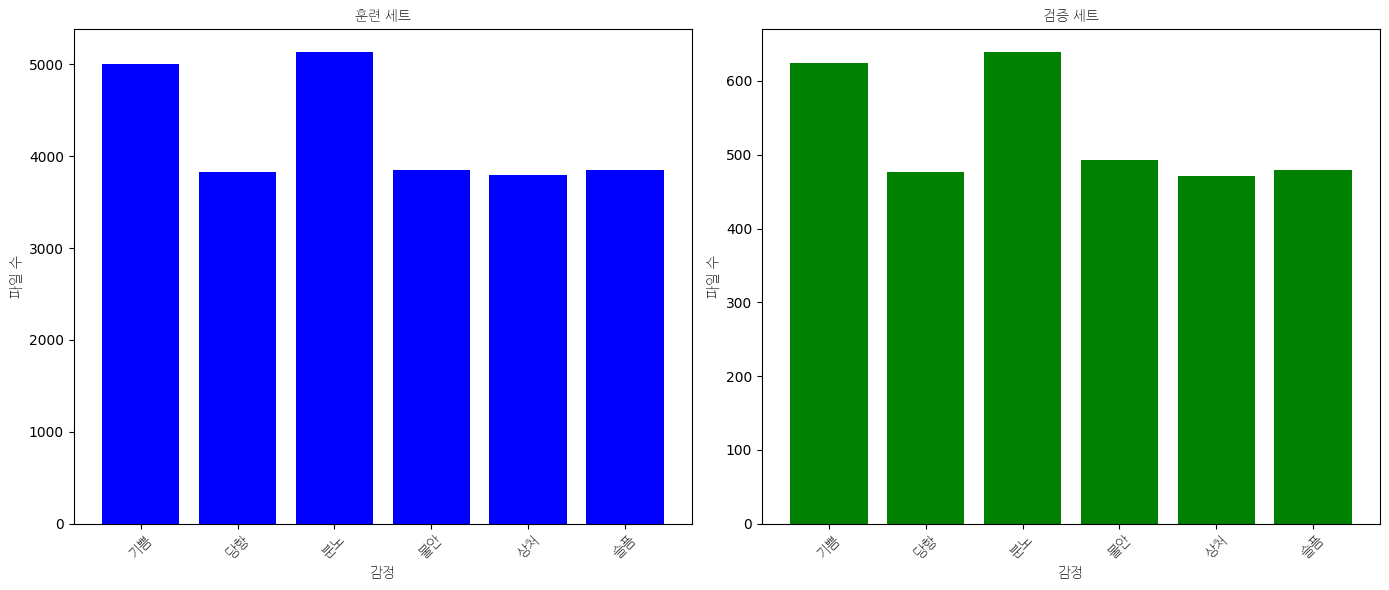

In [6]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# Define the emotions you are looking for
emotions = ["기쁨", "당황", "분노", "불안", "상처", "슬픔"]

# Set up Korean font
font_path = 'C:/Windows/Fonts/NanumGothicLight.ttf'  # Ensure this path is correct
font_prop = fm.FontProperties(fname=font_path)

def count_emotion_files(directory, emotions):
    # Initialize a counter for each emotion
    emotion_counter = Counter()
    
    # List all files in the directory
    for filename in os.listdir(directory):
        for emotion in emotions:
            if emotion in filename:
                emotion_counter[emotion] += 1
                
    return emotion_counter

# Paths
training_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터"
validation_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Validation/02.라벨링데이터"

# Output directories
train_output_directory = os.path.join(training_path, 'real_data')
validation_output_directory = os.path.join(validation_path, 'real_data')

# Count files
train_emotion_count = count_emotion_files(train_output_directory, emotions)
validation_emotion_count = count_emotion_files(validation_output_directory, emotions)

# Print the counts
print("Training set emotion counts:", train_emotion_count)
print("Validation set emotion counts:", validation_emotion_count)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Training set plot
ax1.bar(train_emotion_count.keys(), train_emotion_count.values(), color='b')
ax1.set_xlabel('감정', fontproperties=font_prop)
ax1.set_ylabel('파일 수', fontproperties=font_prop)
ax1.set_title('훈련 세트', fontproperties=font_prop)
ax1.set_xticklabels(train_emotion_count.keys(), rotation=45, fontproperties=font_prop)

# Validation set plot
ax2.bar(validation_emotion_count.keys(), validation_emotion_count.values(), color='g')
ax2.set_xlabel('감정', fontproperties=font_prop)
ax2.set_ylabel('파일 수', fontproperties=font_prop)
ax2.set_title('검증 세트', fontproperties=font_prop)
ax2.set_xticklabels(validation_emotion_count.keys(), rotation=45, fontproperties=font_prop)

plt.tight_layout()
plt.show()


## 파일 EDA

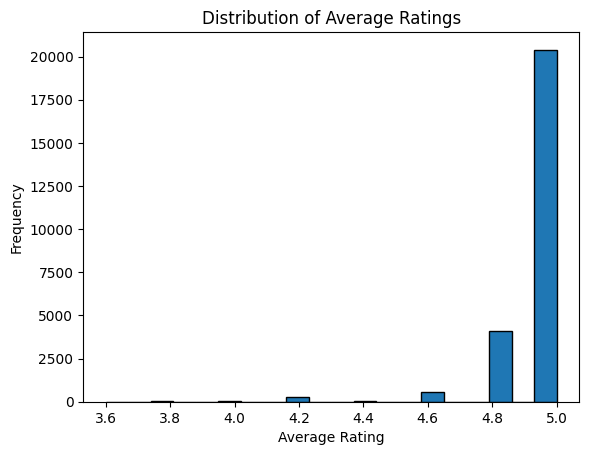

In [7]:
# rating이 낮은 게 있는지 알아보기

ratings = []

for filename in os.listdir(train_output_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(train_output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            data = json.load(file)
            avg_rating = data.get('info', {}).get('evaluation', {}).get('avg_rating')
            if avg_rating is not None:
                ratings.append(avg_rating)
                
# avg_rating 값의 분포를 히스토그램으로 시각화
plt.hist(ratings, bins=20, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

결론 => average rating이 모든 데이터가 5점 만점에 3.6 이상이니까, 그냥 다 쓰자!

In [8]:
import os
import json
import pandas as pd

# Define the directory containing the JSON files
data_directory = 'C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터/real_data'

# Initialize an empty list to store the data
data = []

# Define a mapping for emotions and empathy
emotion_mapping = {"기쁨": 1, "당황": 2, "분노": 3, "불안": 4, "상처": 5, "슬픔": 6, None: 0}
empathy_mapping = {"조언": 1, "격려": 2, "위로": 3, "동조": 4, None: 5}

# Function to process each JSON file
def process_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        content = json.load(file)
        
        situation = content['info']['situation']
        speaker_emotion_initial = content['info']['speaker_emotion']
        speaker_emotion = emotion_mapping[speaker_emotion_initial]
        
        for utterance in content['utterances']:
            situation_id = int(utterance['utterance_id'].split('.')[-1])
            role = 1 if utterance['role'] == 'listener' else 0
            change_emotion = 0 if utterance['speaker_changeEmotion'] is None else 1
            terminate = 1 if utterance['terminate'] else 0
            text = utterance['text']
            
            if role == 1:  # listener
                empathy = empathy_mapping.get(utterance['listener_empathy'][0] if utterance['listener_empathy'] else None, 0)
            else:  # speaker
                empathy = 0
            
            if change_emotion:
                speaker_emotion = emotion_mapping.get(utterance['speaker_changeEmotion'], 0)
            
            data.append({
                "situation_id": situation_id,
                "situation": situation,
                "speaker": role,
                "change_emotion": change_emotion,
                "empathy": empathy,
                "speaker_emotion": speaker_emotion,
                "text": text,
                "terminate": terminate
            })

# Process all JSON files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(data_directory, filename)
        process_json_file(filepath)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


   situation_id                      situation  speaker  change_emotion  \
0             1  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
1             2  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
2             3  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
3             4  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
4             5  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   

   empathy  speaker_emotion                                           text  \
0        0                1       엄마, 아기가 태어나니까 내가 부모로서 해야 할 게 참 많은 것 같아요.   
1        3                1                   그렇지? 아기 키우는 게 여간 어려운 일이 아니야.   
2        0                1  어제 평소보다도 격하게 막 온몸을 써가면서 울더라고요. 얼마나 당황했는지 몰라요.   
3        5                1        배가 고파서 그랬던 것 아닐까? 아기들은 배가 고프면 몸부림을 친단다.   
4        0                1       맞아요. 젖을 물려주니 금세 뚝 그쳤어요. 난 분명히 순했을 것 같은데.   

   terminate  
0          0  
1          0  
2          0  
3          0  
4    

In [9]:
import os
import json
import pandas as pd

# Define the directory containing the JSON files
data_directory = 'C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터/real_data'

# Initialize an empty list to store the data
data = []

# Define a mapping for emotions and empathy
emotion_mapping = {"기쁨": 1, "당황": 2, "분노": 3, "불안": 4, "상처": 5, "슬픔": 6, None: 0}
empathy_mapping = {"조언": 1, "격려": 2, "위로": 3, "동조": 4, None: 5}

# Function to process each JSON file
def process_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        content = json.load(file)
        
        situation = content['info']['situation']
        speaker_emotion_initial = content['info']['speaker_emotion']
        speaker_emotion = emotion_mapping[speaker_emotion_initial]
        
        for utterance in content['utterances']:
            situation_id = int(utterance['utterance_id'].split('.')[-1])
            role = 1 if utterance['role'] == 'listener' else 0
            change_emotion = 0 if utterance['speaker_changeEmotion'] is None else 1
            terminate = 1 if utterance['terminate'] else 0
            text = utterance['text']
            
            if role == 1:  # listener
                empathy_list = utterance['listener_empathy'] if utterance['listener_empathy'] else [None]
                empathy = ','.join(str(empathy_mapping.get(empathy, 0)) for empathy in empathy_list)
            else:  # speaker
                empathy = "0"
            
            if change_emotion:
                speaker_emotion = emotion_mapping.get(utterance['speaker_changeEmotion'], 0)
            
            data.append({
                "situation_id": situation_id,
                "situation": situation,
                "speaker": role,
                "change_emotion": change_emotion,
                "empathy": empathy,
                "speaker_emotion": speaker_emotion,
                "text": text,
                "terminate": terminate
            })

# Process all JSON files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(data_directory, filename)
        process_json_file(filepath)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


   situation_id                      situation  speaker  change_emotion  \
0             1  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
1             2  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
2             3  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
3             4  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
4             5  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   

  empathy  speaker_emotion                                           text  \
0       0                1       엄마, 아기가 태어나니까 내가 부모로서 해야 할 게 참 많은 것 같아요.   
1       3                1                   그렇지? 아기 키우는 게 여간 어려운 일이 아니야.   
2       0                1  어제 평소보다도 격하게 막 온몸을 써가면서 울더라고요. 얼마나 당황했는지 몰라요.   
3       5                1        배가 고파서 그랬던 것 아닐까? 아기들은 배가 고프면 몸부림을 친단다.   
4       0                1       맞아요. 젖을 물려주니 금세 뚝 그쳤어요. 난 분명히 순했을 것 같은데.   

   terminate  
0          0  
1          0  
2          0  
3          0  
4          

In [10]:
df_train = df.copy()

In [11]:
# Define the directory containing the JSON files
data_directory = validation_output_directory 

# Initialize an empty list to store the data
data = []

# Define a mapping for emotions and empathy
emotion_mapping = {"기쁨": 1, "당황": 2, "분노": 3, "불안": 4, "상처": 5, "슬픔": 6, None: 0}
empathy_mapping = {"조언": 1, "격려": 2, "위로": 3, "동조": 4, None: 5}

# Function to process each JSON file
def process_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        content = json.load(file)
        
        situation = content['info']['situation']
        speaker_emotion_initial = content['info']['speaker_emotion']
        speaker_emotion = emotion_mapping[speaker_emotion_initial]
        
        for utterance in content['utterances']:
            situation_id = int(utterance['utterance_id'].split('.')[-1])
            role = 1 if utterance['role'] == 'listener' else 0
            change_emotion = 0 if utterance['speaker_changeEmotion'] is None else 1
            terminate = 1 if utterance['terminate'] else 0
            text = utterance['text']
            
            if role == 1:  # listener
                empathy_list = utterance['listener_empathy'] if utterance['listener_empathy'] else [None]
                empathy = ','.join(str(empathy_mapping.get(empathy, 0)) for empathy in empathy_list)
            else:  # speaker
                empathy = "0"
            
            if change_emotion:
                speaker_emotion = emotion_mapping.get(utterance['speaker_changeEmotion'], 0)
            
            data.append({
                "situation_id": situation_id,
                "situation": situation,
                "speaker": role,
                "change_emotion": change_emotion,
                "empathy": empathy,
                "speaker_emotion": speaker_emotion,
                "text": text,
                "terminate": terminate
            })

# Process all JSON files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(data_directory, filename)
        process_json_file(filepath)

# Create a DataFrame from the collected data
df_validation = pd.DataFrame(data)

# Display the DataFrame
print(df_validation.head())


   situation_id        situation  speaker  change_emotion empathy  \
0             1  성적이 올라 칭찬을 받았다.        0               0       0   
1             2  성적이 올라 칭찬을 받았다.        1               0       4   
2             3  성적이 올라 칭찬을 받았다.        0               0       0   
3             4  성적이 올라 칭찬을 받았다.        1               0       4   
4             5  성적이 올라 칭찬을 받았다.        0               0       0   

   speaker_emotion                                               text  \
0                1  엄마, 학교에서 성적이 나왔는데 꽤 만족스러워요. 빨리 이 점수를 엄마 눈으로 확인...   
1                1  성적 나오자마자 학교에서 연락한 거 보니 점수가 좋은가 보다. 네가 들떠있는 것 같...   
2                1  점수가 많이 향상됐다고 담임 선생님께 칭찬받았어요. 그러니까 더 만족스럽고 기분이 ...   
3                1  칭찬은 누구든 마음이 기쁨의 춤을 추게 하지. 노력의 결과에 칭찬받게 되면 앞으로 ...   
4                1  더구나 많은 친구 앞에서 칭찬해 주시는데 부끄러우면서도 마음에 자신감이 붙더라고요....   

   terminate  
0          0  
1          0  
2          0  
3          0  
4          0  


In [12]:
#일단 파일 내보내기
#df_train.to_csv('C:/Users/seowoo kim/Desktop/train_data.csv', index=False, encoding='utf-8-sig')
#df_validation.to_csv('C:/Users/seowoo kim/Desktop/validation_data.csv', index=False, encoding='utf-8-sig')

In [4]:
# 다시 파일 불러오기...
df_train = pd.read_csv('C:/Users/seowoo kim/Desktop/train_data.csv')
df_validation = pd.read_csv('C:/Users/seowoo kim/Desktop/validation_data.csv')

In [14]:
df_train.head()

,situation_id,situation,speaker,change_emotion,empathy,speaker_emotion,text,terminate
0,1,아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.,0,0,0,1,"엄마, 아기가 태어나니까 내가 부모로서 해야 할 게 참 많은 것 같아요.",0
1,2,아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.,1,0,3,1,그렇지? 아기 키우는 게 여간 어려운 일이 아니야.,0
2,3,아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.,0,0,0,1,어제 평소보다도 격하게 막 온몸을 써가면서 울더라고요. 얼마나 당황했는지 몰라요.,0
3,4,아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.,1,0,5,1,배가 고파서 그랬던 것 아닐까? 아기들은 배가 고프면 몸부림을 친단다.,0
4,5,아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.,0,0,0,1,맞아요. 젖을 물려주니 금세 뚝 그쳤어요. 난 분명히 순했을 것 같은데.,0


Mean: 74.45848115108979
Median: 73.0
75th Percentile: 96.0
90th Percentile: 116.0
95th Percentile: 127.0
99th Percentile: 146.0


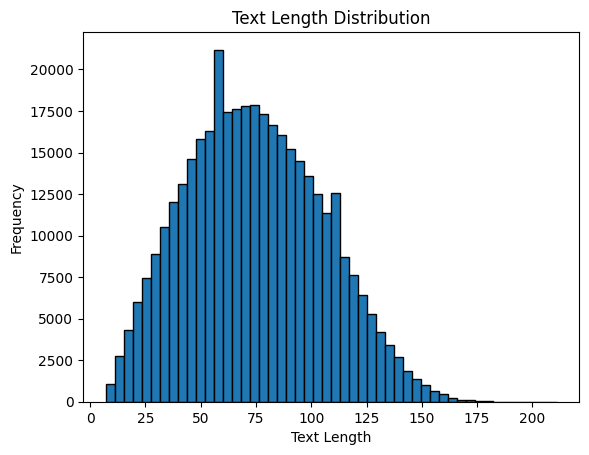

In [15]:
#텍스트 길이 분포 및 평균 텍스트 길이 

text_len = df_train['text'].apply(len)

# 통계 값 계산
length_stats = text_len.describe(percentiles=[.75, .90, .95, .99])
mean_length = length_stats['mean']
median_length = length_stats['50%']
percentile_75 = length_stats['75%']
percentile_90 = length_stats['90%']
percentile_95 = length_stats['95%']
percentile_99 = length_stats['99%']

# 통계 값 출력
print(f"Mean: {mean_length}")
print(f"Median: {median_length}")
print(f"75th Percentile: {percentile_75}")
print(f"90th Percentile: {percentile_90}")
print(f"95th Percentile: {percentile_95}")
print(f"99th Percentile: {percentile_99}")

# 길이 분포 히스토그램 시각화
plt.hist(text_len, bins=50, edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


Speaker 0 (Speaker) Text Length Stats:
Mean: 70.84367328891396
Median: 69.0
75th Percentile: 92.0
90th Percentile: 112.0
95th Percentile: 122.0
99th Percentile: 141.0

Speaker 1 (Listener) Text Length Stats:
Mean: 78.3707219942575
Median: 78.0
75th Percentile: 101.0
90th Percentile: 121.0
95th Percentile: 131.0
99th Percentile: 149.0


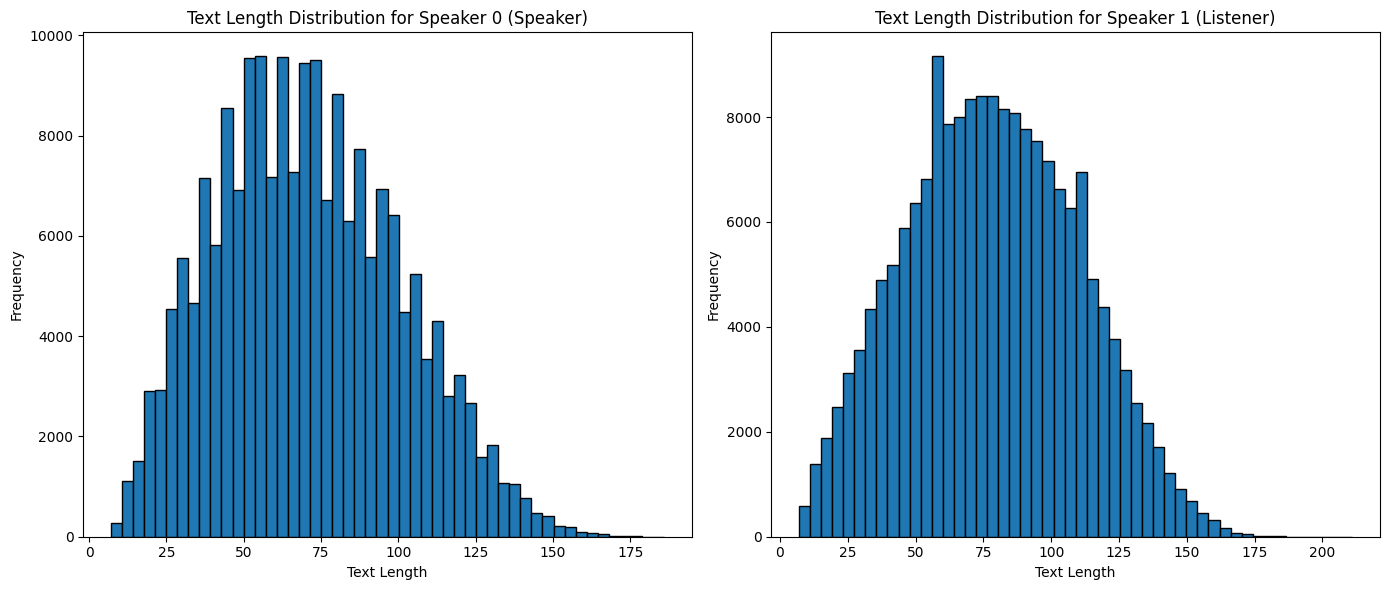

In [16]:
# 발화자와 청자로 나눴을 때
import matplotlib.pyplot as plt

# 텍스트 길이 계산
df_train['text_length'] = df_train['text'].apply(len)

# speaker가 0인 경우
text_len_speaker_0 = df_train[df_train['speaker'] == 0]['text_length']
# speaker가 1인 경우
text_len_speaker_1 = df_train[df_train['speaker'] == 1]['text_length']

# 통계 값 계산
length_stats_0 = text_len_speaker_0.describe(percentiles=[.75, .90, .95, .99])
length_stats_1 = text_len_speaker_1.describe(percentiles=[.75, .90, .95, .99])

# 통계 값 출력
print("Speaker 0 (Speaker) Text Length Stats:")
print(f"Mean: {length_stats_0['mean']}")
print(f"Median: {length_stats_0['50%']}")
print(f"75th Percentile: {length_stats_0['75%']}")
print(f"90th Percentile: {length_stats_0['90%']}")
print(f"95th Percentile: {length_stats_0['95%']}")
print(f"99th Percentile: {length_stats_0['99%']}")

print("\nSpeaker 1 (Listener) Text Length Stats:")
print(f"Mean: {length_stats_1['mean']}")
print(f"Median: {length_stats_1['50%']}")
print(f"75th Percentile: {length_stats_1['75%']}")
print(f"90th Percentile: {length_stats_1['90%']}")
print(f"95th Percentile: {length_stats_1['95%']}")
print(f"99th Percentile: {length_stats_1['99%']}")

# 길이 분포 히스토그램 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(text_len_speaker_0, bins=50, edgecolor='black')
plt.title('Text Length Distribution for Speaker 0 (Speaker)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(text_len_speaker_1, bins=50, edgecolor='black')
plt.title('Text Length Distribution for Speaker 1 (Listener)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [17]:
len(df_train)

378563

In [18]:
len(df_validation)

46804

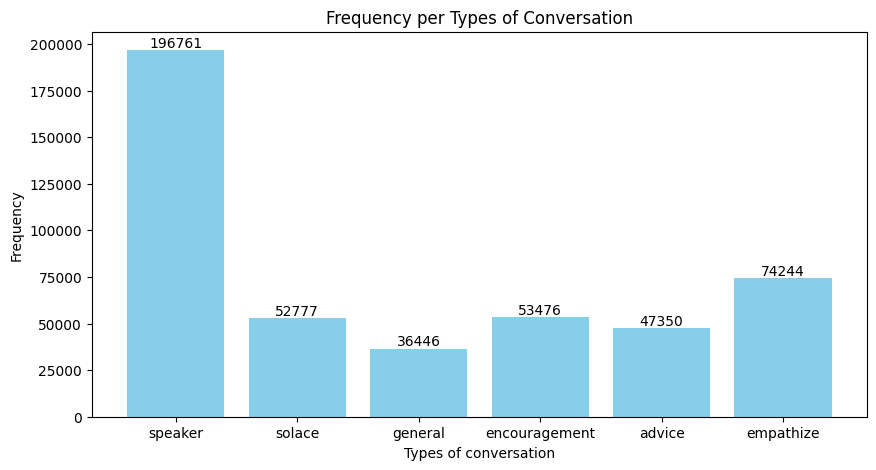

In [19]:
from collections import Counter
# 모든 숫자를 리스트로 변환
all_numbers = [int(num) for sublist in df_train['empathy'].str.split(',') for num in sublist]

# 숫자 카운트
count = Counter(all_numbers)

# 숫자와 의미 매핑
mapping = {
    0: 'speaker',
    1: 'advice',
    2: 'encouragement',
    3: 'solace',
    4: 'empathize',
    5: 'general'
}

mapped_counts = {mapping[k]: v for k, v in count.items()}

# 데이터 준비
labels = list(mapped_counts.keys())
values = list(mapped_counts.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values, color='skyblue')
plt.xlabel('Types of conversation')
plt.ylabel('Frequency')
plt.title('Frequency per Types of Conversation')

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.show()

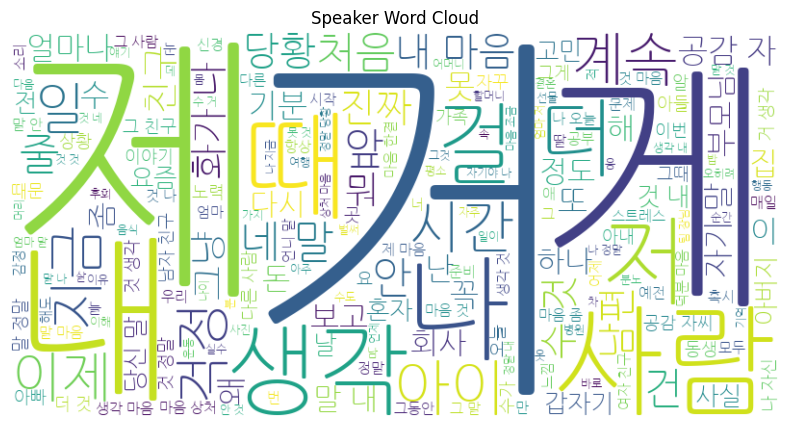

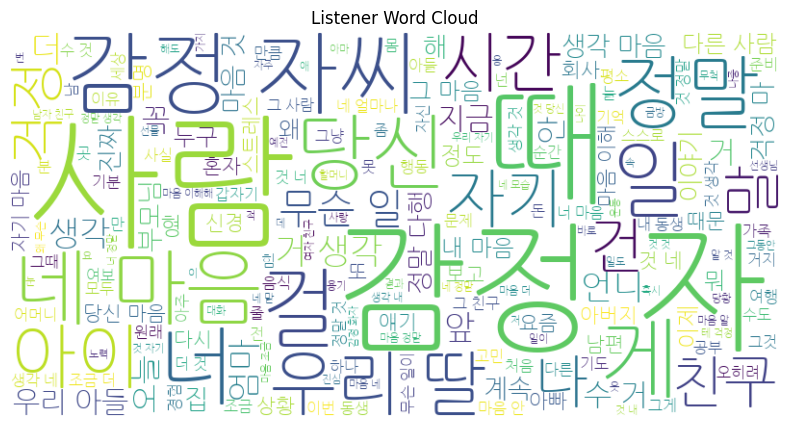

In [20]:
from wordcloud import WordCloud
from konlpy.tag import Okt

# Okt 토크나이저 설정
okt = Okt()

# 불용어 없는 버전

# 텍스트를 토큰화하고 불용어를 제거하는 함수
def tokenize_and_remove_stopwords(text):
    tokens = okt.nouns(text)
    tokens = [word for word in tokens]
    return ' '.join(tokens)

# speaker가 0인 경우
data_speaker_before = ' '.join(df_train[df_train['speaker'] == 0]['text'].apply(tokenize_and_remove_stopwords))

# speaker가 1인 경우
data_listener_before = ' '.join(df_train[df_train['speaker'] == 1]['text'].apply(tokenize_and_remove_stopwords))

# 워드 클라우드 생성 함수
def generate_wordcloud(text, title):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 워드 클라우드 생성 및 시각화
generate_wordcloud(data_speaker_before, 'Speaker Word Cloud')
generate_wordcloud(data_listener_before, 'Listener Word Cloud')

In [21]:
stopwords = ['씨', '게', '일', '자', '가', '나', '다', '엉', '앙', '그', '것', '도', '라', '거', '것', '네', '수', '그럴 수', '없다', '이럴 수', '없어', '없니', '하지', '마', '그렇지',
             '하여간', '그나저나', '건', '뉸', '요', '것', '그', '그녀', '날', '널', '그를' ,'그녈', '은', '는', '이', '를', '안', '분', '지']


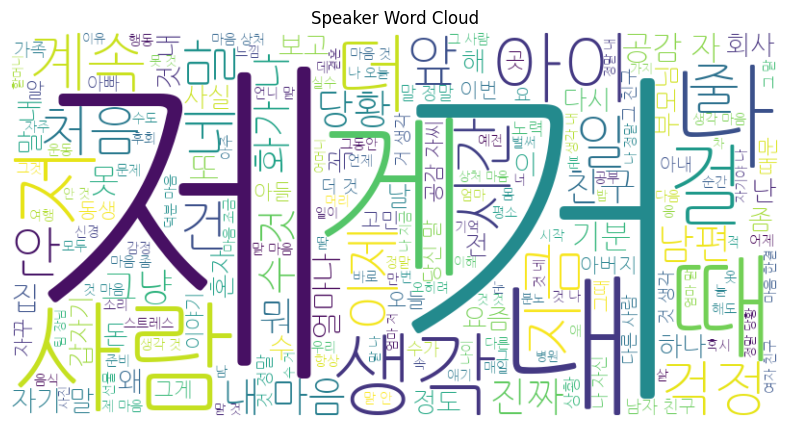

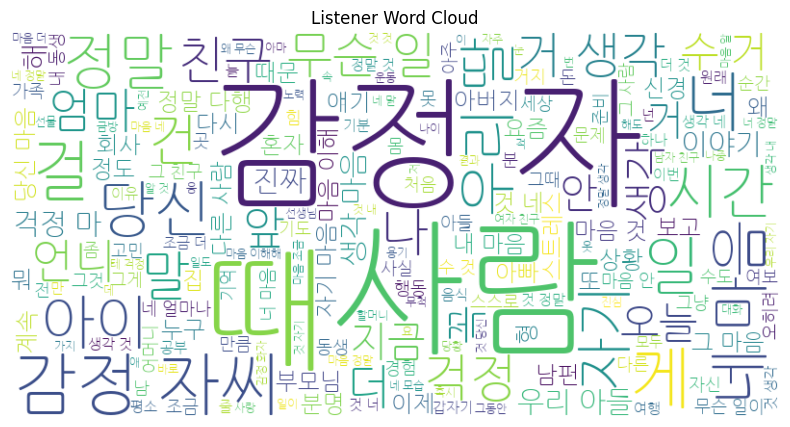

In [22]:
# 불용어 있는 버전

stopwords = []
# 텍스트를 토큰화하고 불용어를 제거하는 함수
def tokenize_and_remove_stopwords(text):
    tokens = okt.nouns(text)
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

# speaker가 0인 경우
data_speaker = ' '.join(df_train[df_train['speaker'] == 0]['text'].apply(tokenize_and_remove_stopwords))

# speaker가 1인 경우
data_listener = ' '.join(df_train[df_train['speaker'] == 1]['text'].apply(tokenize_and_remove_stopwords))

# 워드 클라우드 생성 함수
def generate_wordcloud(text, title):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 워드 클라우드 생성 및 시각화
generate_wordcloud(data_speaker, 'Speaker Word Cloud')
generate_wordcloud(data_listener, 'Listener Word Cloud')

In [26]:
# 모든 단어를 리스트로 변환
speaker_tokens = data_speaker.split()
listener_tokens = data_listener.split()

# 단어 빈도수 계산
speaker_word_counts = Counter(speaker_tokens)
listener_word_counts = Counter(listener_tokens)

# 상위 50개 단어 추출
top_50_speaker = speaker_word_counts.most_common(50)
top_50_listener = listener_word_counts.most_common(50)

print("Top 50 words in speaker data:")
print(top_50_speaker)

print("\nTop 50 words in listener data:")
print(top_50_listener)

Top 50 words in speaker data:
[('것', 61906), ('내', 53848), ('말', 45205), ('나', 42026), ('생각', 40324), ('마음', 39137), ('정말', 37239), ('거', 26576), ('더', 26497), ('안', 24476), ('수', 22877), ('제', 21156), ('저', 20152), ('친구', 19722), ('사람', 19722), ('게', 17738), ('그', 17509), ('엄마', 17379), ('오늘', 15860), ('기분', 15615), ('때', 14539), ('상처', 14351), ('일', 14015), ('못', 13937), ('네', 13235), ('지금', 12382), ('자기', 11902), ('당황', 11807), ('우리', 11246), ('이', 11064), ('화가', 10783), ('응', 10651), ('걸', 10416), ('당신', 9855), ('좀', 9844), ('덕분', 9465), ('걱정', 9174), ('언니', 8828), ('시간', 8706), ('건', 8414), ('이제', 8182), ('집', 8152), ('해', 8013), ('아이', 7693), ('사실', 7184), ('공감', 7172), ('회사', 7141), ('조금', 7099), ('얘기', 7077), ('이번', 6975)]

Top 50 words in listener data:
[('마음', 62220), ('것', 57842), ('네', 47756), ('생각', 43982), ('거', 36632), ('정말', 34779), ('너', 32730), ('수', 31936), ('자기', 28180), ('사람', 28165), ('당신', 26810), ('말', 25565), ('내', 25171), ('더', 24488), ('일', 24342), ('그', 2374

In [27]:
# 모든 단어를 리스트로 변환
speaker_tokens = data_speaker_before.split()
listener_tokens = data_listener_before.split()

# 단어 빈도수 계산
speaker_word_counts = Counter(speaker_tokens)
listener_word_counts = Counter(listener_tokens)

# 상위 50개 단어 추출
top_50_speaker = speaker_word_counts.most_common(50)
top_50_listener = listener_word_counts.most_common(50)

print("Top 50 words in speaker data:")
print(top_50_speaker)

print("\nTop 50 words in listener data:")
print(top_50_listener)

Top 50 words in speaker data:
[('것', 61906), ('내', 53848), ('말', 45205), ('나', 42026), ('생각', 40324), ('마음', 39137), ('정말', 37239), ('거', 26576), ('더', 26497), ('안', 24476), ('수', 22877), ('제', 21156), ('저', 20152), ('친구', 19722), ('사람', 19722), ('게', 17738), ('그', 17509), ('엄마', 17379), ('오늘', 15860), ('기분', 15615), ('때', 14539), ('상처', 14351), ('일', 14015), ('못', 13937), ('네', 13235), ('지금', 12382), ('자기', 11902), ('당황', 11807), ('우리', 11246), ('이', 11064), ('화가', 10783), ('응', 10651), ('걸', 10416), ('당신', 9855), ('좀', 9844), ('덕분', 9465), ('걱정', 9174), ('언니', 8828), ('시간', 8706), ('건', 8414), ('이제', 8182), ('집', 8152), ('해', 8013), ('아이', 7693), ('사실', 7184), ('공감', 7172), ('회사', 7141), ('조금', 7099), ('얘기', 7077), ('이번', 6975)]

Top 50 words in listener data:
[('마음', 62220), ('것', 57842), ('네', 47756), ('생각', 43982), ('거', 36632), ('정말', 34779), ('너', 32730), ('수', 31936), ('자기', 28180), ('사람', 28165), ('당신', 26810), ('말', 25565), ('내', 25171), ('더', 24488), ('일', 24342), ('그', 2374

In [28]:
import pandas as pd

# 상위 50개 단어와 빈도수를 데이터프레임으로 변환
speaker_df = pd.DataFrame(top_50_speaker, columns=['Word', 'Frequency'])
listener_df = pd.DataFrame(top_50_listener, columns=['Word', 'Frequency'])

# 테이블 출력
print("Top 50 words in speaker data:")
print(speaker_df)

print("\nTop 50 words in listener data:")
print(listener_df)

Top 50 words in speaker data:
   Word  Frequency
0     것      61906
1     내      53848
2     말      45205
3     나      42026
4    생각      40324
5    마음      39137
6    정말      37239
7     거      26576
8     더      26497
9     안      24476
10    수      22877
11    제      21156
12    저      20152
13   친구      19722
14   사람      19722
15    게      17738
16    그      17509
17   엄마      17379
18   오늘      15860
19   기분      15615
20    때      14539
21   상처      14351
22    일      14015
23    못      13937
24    네      13235
25   지금      12382
26   자기      11902
27   당황      11807
28   우리      11246
29    이      11064
30   화가      10783
31    응      10651
32    걸      10416
33   당신       9855
34    좀       9844
35   덕분       9465
36   걱정       9174
37   언니       8828
38   시간       8706
39    건       8414
40   이제       8182
41    집       8152
42    해       8013
43   아이       7693
44   사실       7184
45   공감       7172
46   회사       7141
47   조금       7099
48   얘기       7077
49   이번       6975



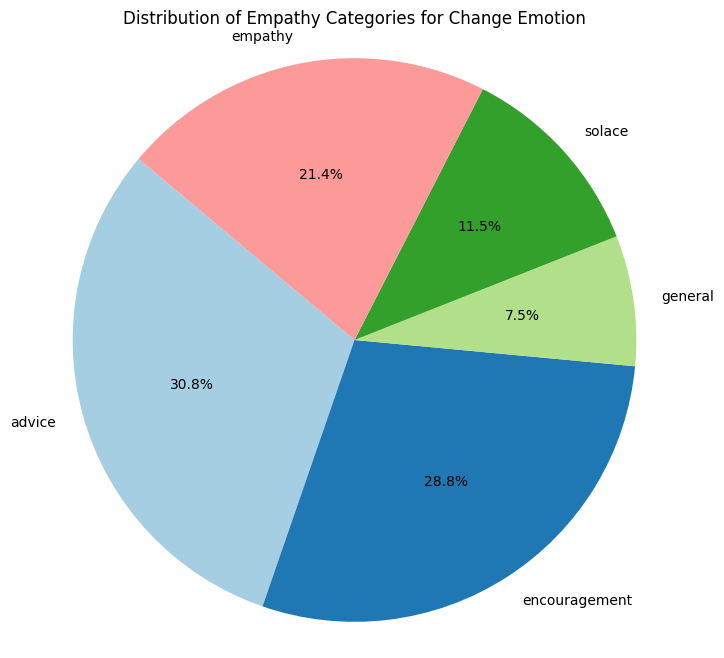

In [29]:
# 바로 직전 행의 empathy 값을 가져오는 함수
def get_previous_empathy(index, df):
    if index > 0:
        return df.iloc[index - 1]['empathy']
    else:
        return None

# change_emotion이 1인 경우의 이전 empathy 값 가져오기
previous_empathy_values = [
    get_previous_empathy(index, df_train) 
    for index in df_train[df_train['change_emotion'] == 1].index
]

# 이전 empathy 값에서 숫자를 추출하여 세트와 누적 빈도수 계산
all_empathy_numbers = []
for value in previous_empathy_values:
    if value:
        all_empathy_numbers.extend(map(int, value.split(',')))

# 숫자 매핑
mapping = {1: 'advice', 2: 'encouragement', 3: 'solace', 4: 'empathy', 5: 'general'}

# 매핑 적용 후 카운트
mapped_counts = Counter([mapping[num] for num in all_empathy_numbers if num in mapping])

# 데이터 준비
labels = list(mapped_counts.keys())
sizes = list(mapped_counts.values())

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Empathy Categories for Change Emotion')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [30]:
mapped_counts

Counter({'advice': 9905,
         'encouragement': 9257,
         'empathy': 6882,
         'solace': 3689,
         'general': 2405})

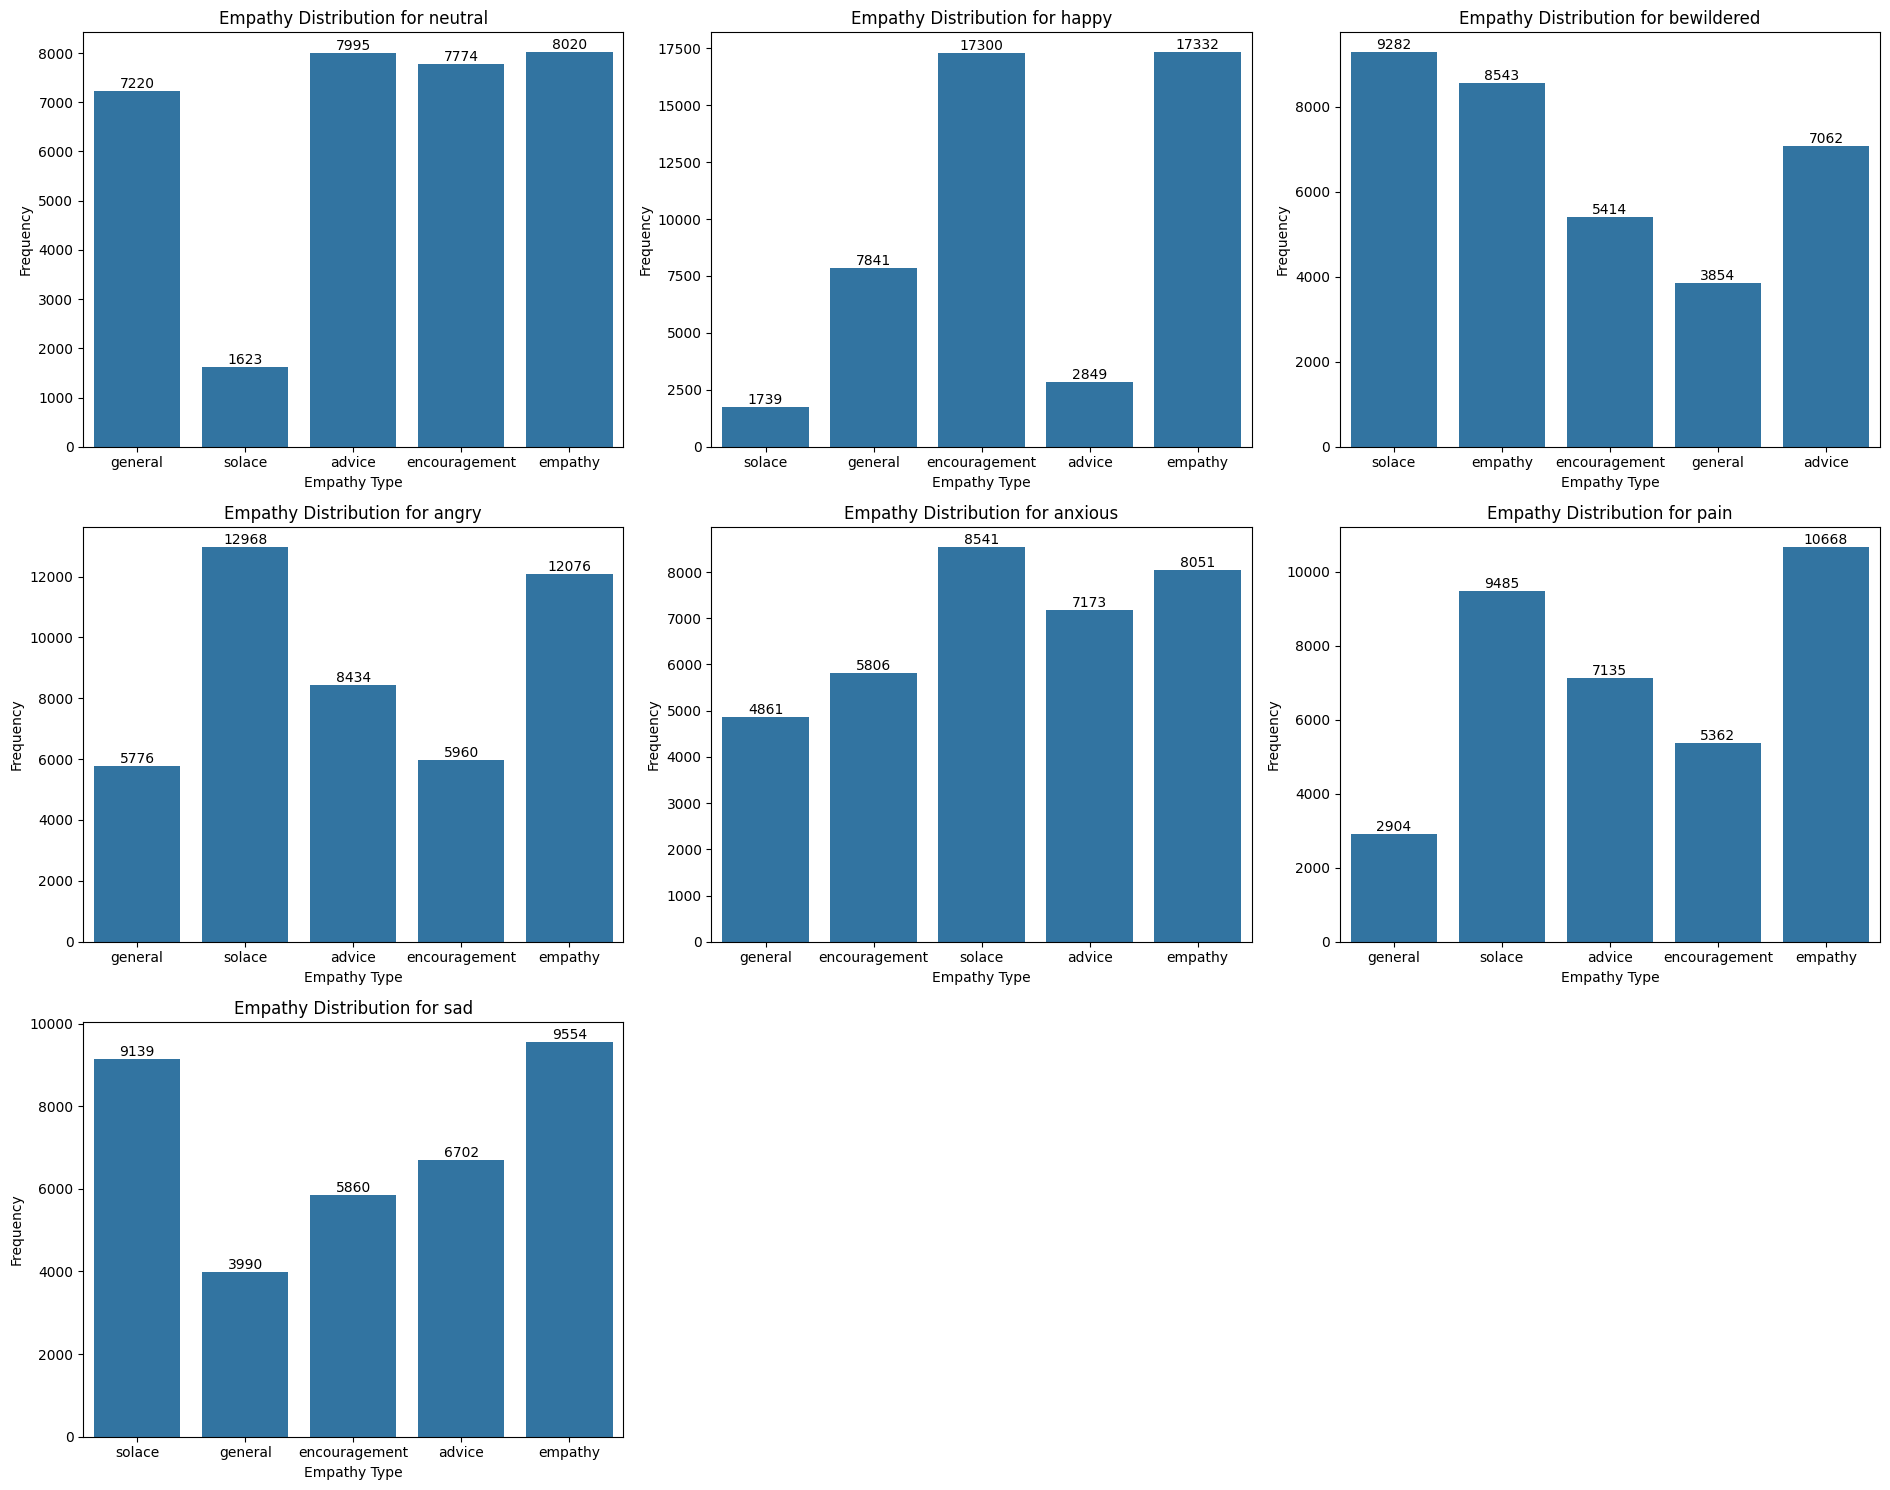

In [36]:
import seaborn as sns
emotion_mapping = {
    0: 'neutral',
    1: 'happy',
    2: 'bewildered',
    3: 'angry',
    4: 'anxious',
    5: 'pain',
    6: 'sad'
}

# 공감 매핑
empathy_mapping = {
    1: 'advice',
    2: 'encouragement',
    3: 'solace',
    4: 'empathy',
    5: 'general'
}

# 모든 감정에 대한 데이터 수집
empathy_distribution = {emotion: Counter() for emotion in emotion_mapping.values()}

for index, row in df_train.iterrows():
    emotions = emotion_mapping[row['speaker_emotion']]
    empathy_values = map(int, row['empathy'].split(','))
    for value in empathy_values:
        if value in empathy_mapping:
            empathy_distribution[emotions][empathy_mapping[value]] += 1

# 각 감정에 대한 막대그래프 생성
fig, axes = plt.subplots(3, 3, figsize=(19, 15))
axes = axes.flatten()

for idx, (emotion, counts) in enumerate(empathy_distribution.items()):
    ax = axes[idx]
    labels, values = zip(*counts.items())
    sns.barplot(x=list(labels), y=list(values), ax=ax)
    for i in range(len(labels)):
        ax.text(i, values[i] + 0.5, str(values[i]), ha='center', va='bottom')
    ax.set_title(f'Empathy Distribution for {emotion}')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Empathy Type')

# 빈 서브플롯 숨기기
for i in range(len(empathy_distribution), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


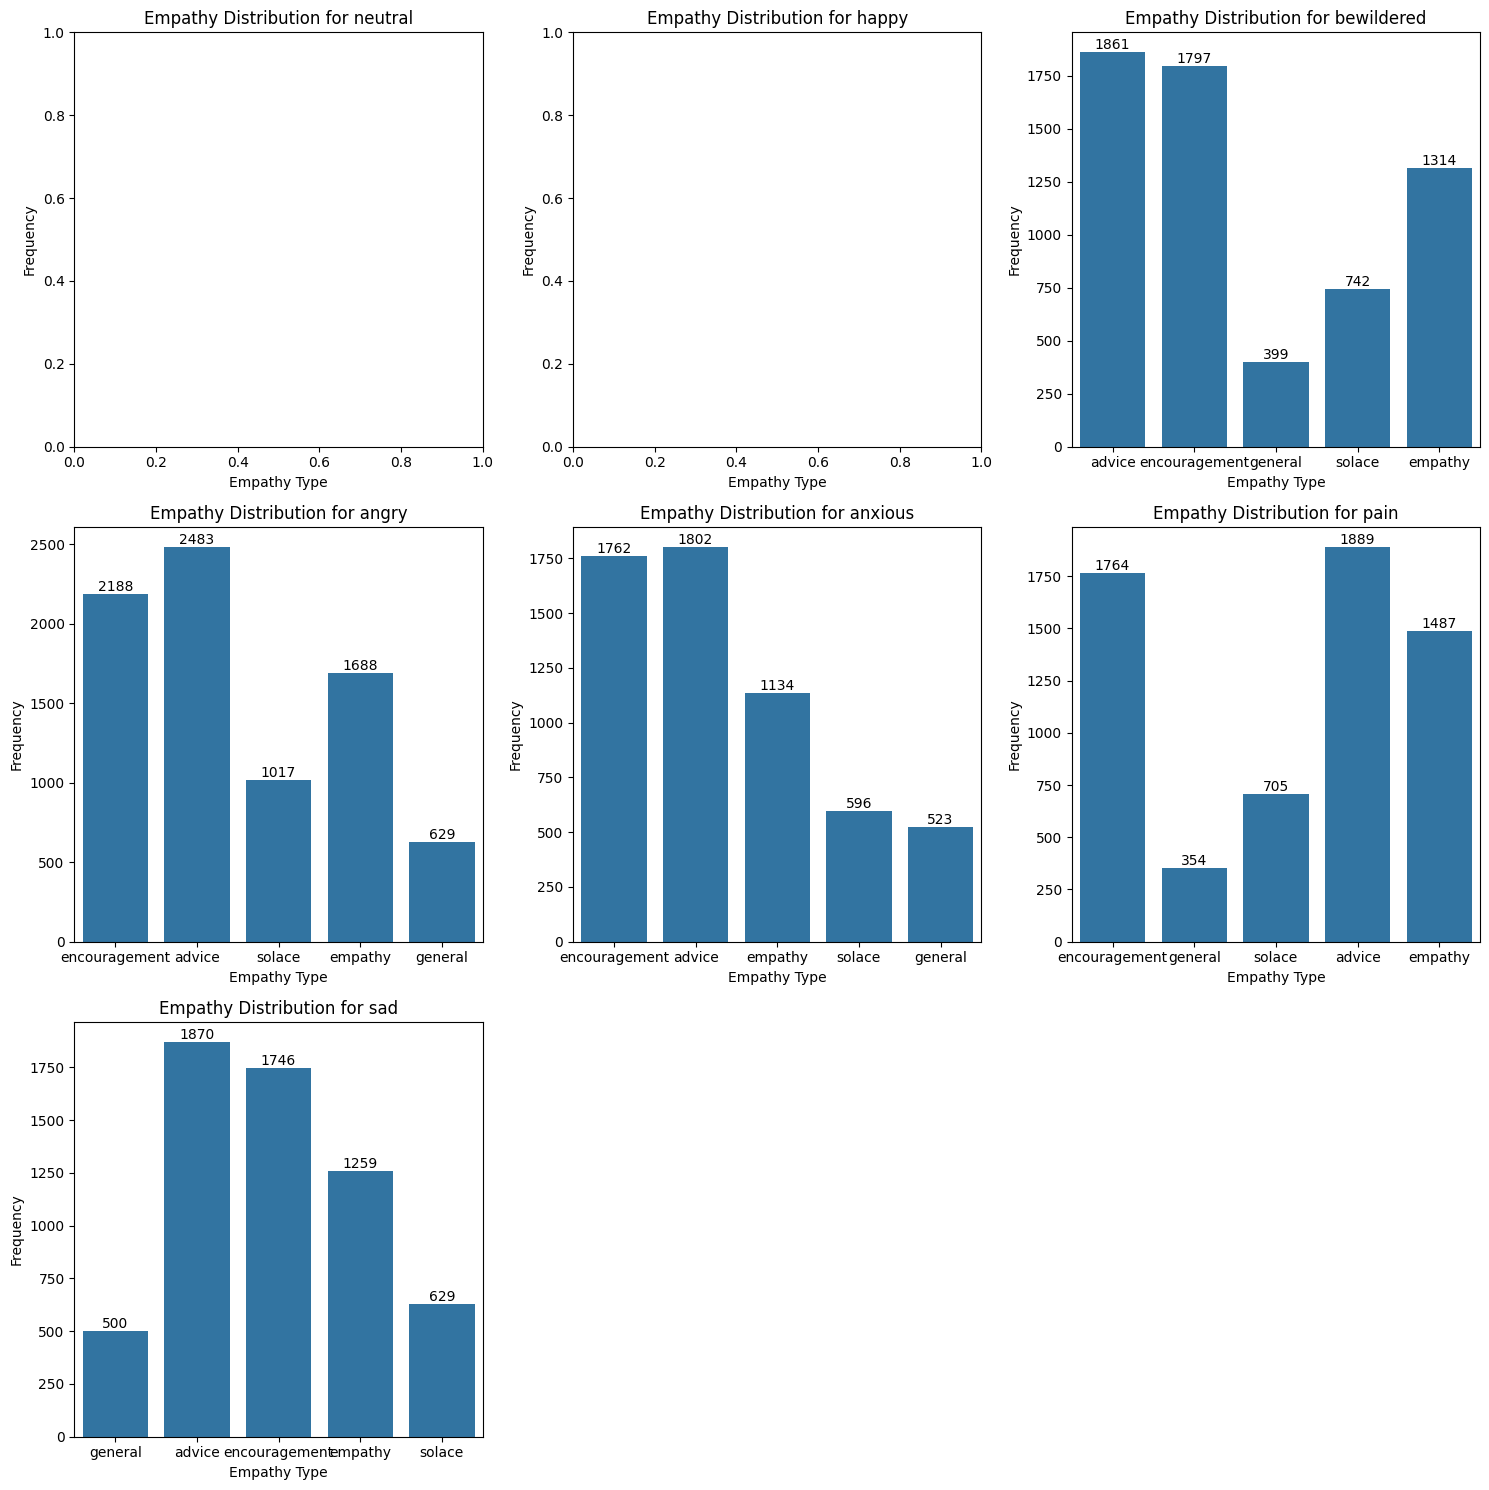

In [9]:
# 감정과 매핑
emotion_mapping = {
    0: 'neutral',
    1: 'happy',
    2: 'bewildered',
    3: 'angry',
    4: 'anxious',
    5: 'pain',
    6: 'sad'
}

# 공감 매핑
empathy_mapping = {
    1: 'advice',
    2: 'encouragement',
    3: 'solace',
    4: 'empathy',
    5: 'general'
}

# 공감 데이터를 수집할 딕셔너리
empathy_distribution = {emotion: Counter() for emotion in emotion_mapping.values()}

# 이전 행의 empathy 값을 가져오는 함수
def get_previous_values(index, df):
    if index > 0:
        prev_row = df.iloc[index - 1]
        return prev_row['speaker_emotion'], prev_row['empathy']
    else:
        return None, None

# change_emotion이 1인 경우의 이전 speaker_emotion과 empathy 값 가져오기
for index, row in df_train[df_train['change_emotion'] == 1].iterrows():
    prev_emotion, prev_empathy = get_previous_values(index, df_train)
    if prev_empathy is not None:
        empathy_values = map(int, prev_empathy.split(','))
        emotion = emotion_mapping[prev_emotion]
        for value in empathy_values:
            if value in empathy_mapping:
                empathy_distribution[emotion][empathy_mapping[value]] += 1

# 각 감정에 대한 막대그래프 생성
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (emotion, counts) in enumerate(empathy_distribution.items()):
    if idx < len(axes):
        ax = axes[idx]
        labels, values = zip(*counts.items()) if counts else ([], [])
        sns.barplot(x=list(labels), y=list(values), ax=ax)
        for i in range(len(labels)):
            ax.text(i, values[i] + 0.5, str(values[i]), ha='center', va='bottom')
        ax.set_title(f'Empathy Distribution for {emotion}')
        ax.set_ylabel('Frequency')
        ax.set_xlabel('Empathy Type')

# 빈 서브플롯 숨기기
for i in range(len(empathy_distribution), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()